In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("CompleteDataset.csv")

C:\Users\1\WPy64-3670\python-3.6.7.amd64\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning:

Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.



# Визуализация №1

(16.0, 42.0)

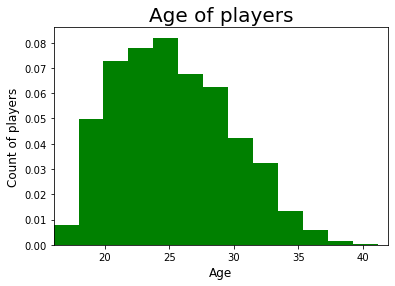

In [9]:
x = df.Age
plt.hist(x,bins = 16, density=True, facecolor='green',)
plt.title('Age of players', fontdict={'fontsize':20})
plt.xlabel('Age', fontdict={'fontsize':12})
plt.ylabel('Count of players', fontdict={'fontsize':12})
plt.xlim(16,42)

Гистограмма, приведенная на рисунке выше, позволяет определить особенности распределение возрастов и преобладающий возраст игроков.

# Визуализация №2

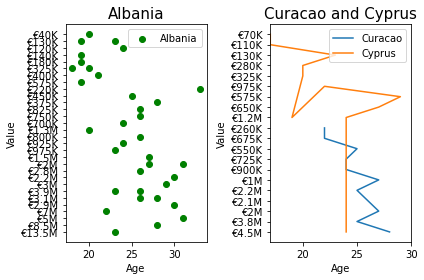

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(nrows = 1, ncols = 2)

axes[0].scatter(df[df.Nationality == 'Albania'].Age, df[df.Nationality == 'Albania'].Value, facecolor='green', label = 'Albania')
axes[0].set_title('Albania', fontsize=15)
#               df[df.Nationality == 'Bulgaria'].Value, df[df.Nationality == 'Bulgaria'].Age)
axes[1].plot(df[df.Nationality == 'Curacao'].Age, df[df.Nationality == 'Curacao'].Value, label = 'Curacao')
axes[1].plot(df[df.Nationality == 'Cyprus'].Age, df[df.Nationality == 'Cyprus'].Value, label = 'Cyprus')
axes[1].set_title('Curacao and Cyprus', fontsize=15)

axes[0].set_xlabel('Age')
axes[0].set_ylabel('Value')
axes[0].legend()
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Value')
axes[1].legend()
axes[1].set_xlim(17,30)
plt.tight_layout()
plt.show()

На рисунке выше слева представлен точечный график зависимости возраста от получаемой зарплаты в Албании, на рисунке справа представлена зависимость возраста от зарплаты для Кюрасао и Кипра.

# Визуализация №3

In [11]:
import plotly.offline as of
import plotly.graph_objects as go
from plotly.offline import iplot
from plotly.graph_objs import Scatter
of.init_notebook_mode(connected=True)


In [12]:
fig = go.Figure()
trace1 = go.Scatter(x = df[df.Potential > 80].Nationality, y = df[df.Potential > 80].Penalties, 
                    mode = 'markers + text',
                   name = 'Penalties if Potential > 80')
fig.add_trace(trace1)
fig.update_layout(title='Penalties',
    xaxis_title="Nationality",
    yaxis_title="Penalties",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
))
fig.show()

Приведенный выше график отражает зависимость между числом пенальти для каждой страны. При этом число пенальти отражается при условии, что потенциал больше 80.

# Визуализация №4

In [13]:
df1 = df.groupby(['Nationality'])[['Potential']].max()
df2 = df.groupby(['Nationality'])[['Potential']].mean()
df_Nationality1 = df1.index.tolist()
df_Nationality2 = df2.index.tolist()
#df1 = df[['Nationality', 'Potential']]
#df2 = df[['Nationality', 'Potential']]

In [14]:
import plotly.graph_objects as go
fig = go.Figure(data=[
     go.Bar(name='Mean of Potential', x=df_Nationality1, y=df2.Potential),
     go.Bar(name='Maximum of Potential', x=df_Nationality2, y=df1.Potential)
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.update_layout(title='Potential',
    xaxis_title="Nationality",
    yaxis_title="Potential",
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="#7f7f7f"
))
fig.show()

На приведенном выше графике приведена гистограмма распределения максимального потенциала (красное) и среднего потенциала для стран. По гистограмме можно определить страны с наибольшим потенциалом. 